Plot the number images:


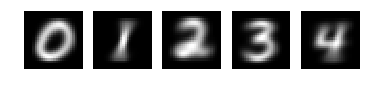

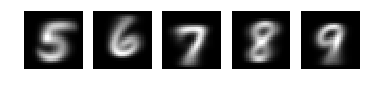

In [8]:
import scipy.io
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
 
train_mat = scipy.io.loadmat('data/mnist_train.mat')
train_data = train_mat['images']
train_labels = train_mat['labels']
 
test_mat = scipy.io.loadmat('data/mnist_test.mat')
test_data = test_mat['t10k_images']
test_labels = test_mat['t10k_labels']

meansArray = [] 
subplot = 150
print "Plot the number images:"
for x in range(0,10):
    subplot = subplot + 1
    plt.subplot(subplot).axis("off")
    numbers = train_data[:,(train_labels == x).ravel()]
    avgNumbers = np.mean(numbers,axis=1)
    meansArray.append(avgNumbers)
    plt.imshow( avgNumbers.reshape(28,28).T, interpolation='nearest', cmap=matplotlib.cm.gray)
    if (x+1)%5==0:
        subplot = 150
        plt.show()

In [9]:
xLength = xrange(len(test_labels))
yLength = xrange(len(meansArray))

pred_vals = []
act_vals = []

for x in xLength:
    act_vals.append(test_labels[x][0])
    means = []
    for y in yLength:
        means.append(np.mean(pow(((test_data[:,x] + meansArray[y])/2) - meansArray[y],2)))

    pred_vals.append(np.argmin(means))

Confusion matrix:
Predicted    0     1    2     3     4    5    6    7    8     9  __all__
Actual                                                                  
0          878     0    7     2     2   58   25    1    7     0      980
1            0  1092   10     3     0    7    3    0   20     0     1135
2           19    71  781    33    31    3   23   18   50     3     1032
3            4    24   25   814     1   49    8   15   58    12     1010
4            1    22    2     0   811    3   16    1   10   116      982
5           11    63    2   118    21  612   27   10   13    15      892
6           18    27   22     0    31   32  827    0    1     0      958
7            2    59   22     1    20    2    0  856   13    53     1028
8           14    39   11    83    12   36   13   10  718    38      974
9           15    22    7    10    83   12    1   27   18   814     1009
__all__    962  1419  889  1064  1012  814  943  938  908  1051    10000


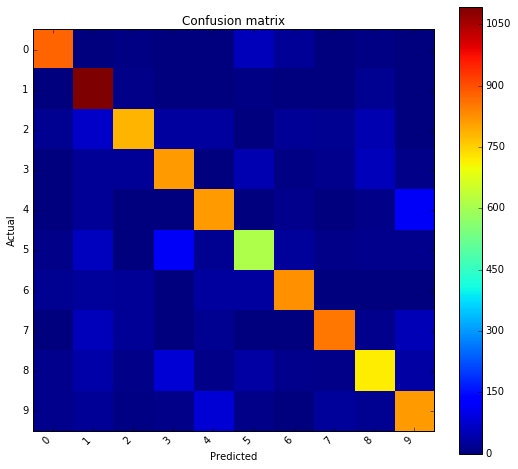

In [10]:
from pandas_confusion import ConfusionMatrix
confusion_matrix = ConfusionMatrix(act_vals, pred_vals)
confusion_matrix.plot(cmap=matplotlib.cm.jet)
print("Confusion matrix:\n%s" % confusion_matrix)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(act_vals, pred_vals, target_names=test_labels))

from sklearn.metrics import hamming_loss
print hamming_loss(act_vals, pred_vals)

from sklearn.metrics import jaccard_similarity_score
print jaccard_similarity_score(act_vals, pred_vals)


             precision    recall  f1-score   support

        [7]       0.91      0.90      0.90       980
        [2]       0.77      0.96      0.86      1135
        [1]       0.88      0.76      0.81      1032
        [0]       0.77      0.81      0.78      1010
        [4]       0.80      0.83      0.81       982
        [1]       0.75      0.69      0.72       892
        [4]       0.88      0.86      0.87       958
        [9]       0.91      0.83      0.87      1028
        [5]       0.79      0.74      0.76       974
        [9]       0.77      0.81      0.79      1009

avg / total       0.82      0.82      0.82     10000

0.1797
0.8203


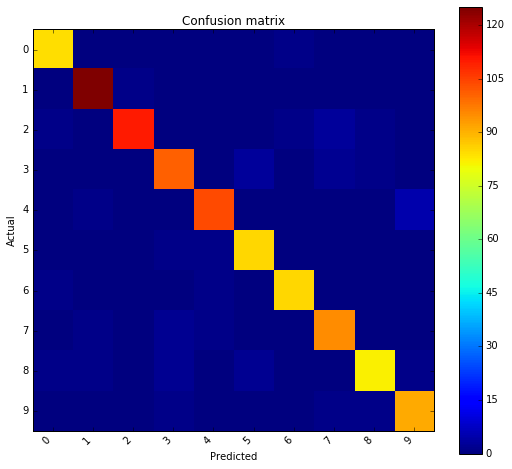

In [13]:
test_vals = act_vals[:1000]
xLength = xrange(len(test_vals))
yLength = xrange(len(meansArray))

from math import exp

final_predictions = []
for x in xLength:
    sum_predictions = np.zeros(10)
    for y in yLength:
            trainingMatrix = train_data[:,(train_labels == y).ravel()]
            X = test_data[:,x]
            sum_predictions[y] =  np.mean(np.exp((-1/2 * np.sum((((X.reshape(784,1) - trainingMatrix ) * (X.reshape(784,1) - trainingMatrix))), axis = 0).ravel())))
    final_predictions.append(np.argmax(sum_predictions))

confusion_matrix = ConfusionMatrix(test_vals, final_predictions)
confusion_matrix.plot(cmap=matplotlib.cm.jet)

In [7]:
from sklearn.metrics import classification_report
print(classification_report(test_vals, final_predictions, target_names=test_labels))

from sklearn.metrics import hamming_loss
print hamming_loss(test_vals, final_predictions)
from sklearn.metrics import jaccard_similarity_score
print jaccard_similarity_score(test_vals, final_predictions)

             precision    recall  f1-score   support

        [7]       0.97      0.99      0.98        85
        [2]       0.98      0.99      0.98       126
        [1]       0.99      0.95      0.97       116
        [0]       0.94      0.94      0.94       107
        [4]       0.97      0.95      0.96       110
        [1]       0.94      0.98      0.96        87
        [4]       0.98      0.98      0.98        87
        [9]       0.94      0.96      0.95        99
        [5]       0.96      0.92      0.94        89
        [9]       0.94      0.97      0.95        94

avg / total       0.96      0.96      0.96      1000

0.038
0.962
